In [1]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

131072

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('zomato.csv', engine='python', error_bad_lines=False, encoding='utf-8')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df = df.drop(['url', 'phone', 'dish_liked', 'menu_item', 'listed_in(city)'], axis=1)

df = df.rename(columns={'approx_cost(for two people)':'cost',
                        'listed_in(type)':'type'})

df.name = df.name.apply(lambda x:x.title())

df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)

df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [28]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [8]:
df.shape

(49440, 12)

In [9]:
df.columns.values.tolist()

['address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'cost',
 'reviews_list',
 'type']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       49440 non-null  object 
 1   name          49440 non-null  object 
 2   online_order  49440 non-null  bool   
 3   book_table    49440 non-null  bool   
 4   rate          41665 non-null  float64
 5   votes         49440 non-null  int64  
 6   location      49419 non-null  object 
 7   rest_type     49215 non-null  object 
 8   cuisines      49395 non-null  object 
 9   cost          49099 non-null  float64
 10  reviews_list  49440 non-null  object 
 11  type          49440 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 3.9+ MB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rate,41665.0,3.700449,0.440513,1.8,3.4,3.7,4.0,4.9
votes,49440.0,296.763451,819.779986,0.0,9.0,47.0,212.0,16832.0
cost,49099.0,361.297400,231.111464,1.0,200.0,350.0,500.0,950.0


In [12]:
df.describe(include=[object]).transpose()

,count,unique,top,freq
address,49440,11050,Delivery Only,119
name,49440,8410,Cafe Coffee Day,93
location,49419,93,BTM,4793
rest_type,49215,93,Quick Bites,18003
cuisines,49395,2632,North Indian,2777
reviews_list,49440,22070,[],6395
type,49440,7,Delivery,24728


In [13]:
df.describe(include=[np.bool]).transpose()

,count,unique,top,freq
online_order,49440,2,True,29342
book_table,49440,2,False,43120


In [14]:
def encode_categorical_columns(df):
    columns_to_encode = [col for col in df.columns
                         if col not in ['rate', 'cost', 'votes']]

    for column in columns_to_encode:
        df[column] = df[column].factorize()[0]

    return df

df_encoded = encode_categorical_columns(df.copy())

In [15]:
corr = df_encoded.corr(method='kendall')
corr

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type
address,1.000000,0.626268,0.151626,0.026849,-0.024140,-0.070704,0.359793,0.011104,0.088349,-0.008752,0.342196,0.074147
name,0.626268,1.000000,0.212609,-0.021779,-0.030344,-0.113985,0.272779,-0.003322,0.148036,-0.073170,0.190070,0.092176
online_order,0.151626,0.212609,1.000000,0.001500,-0.065014,-0.236317,0.052976,0.093252,-0.016523,-0.159356,-0.081881,0.224312
book_table,0.026849,-0.021779,0.001500,1.000000,-0.374247,-0.379766,-0.049370,-0.047623,-0.195101,0.204068,-0.151925,-0.096116
rate,-0.024140,-0.030344,-0.065014,-0.374247,1.000000,0.532209,0.049207,0.087816,0.156289,-0.060851,0.125738,0.024580
votes,-0.070704,-0.113985,-0.236317,-0.379766,0.532209,1.000000,0.033137,-0.045858,0.164167,0.066520,0.296748,0.019885
location,0.359793,0.272779,0.052976,-0.049370,0.049207,0.033137,1.000000,0.032350,0.083632,-0.031486,0.243624,0.041521
rest_type,0.011104,-0.003322,0.093252,-0.047623,0.087816,-0.045858,0.032350,1.000000,0.019787,-0.211590,0.005386,0.000896
cuisines,0.088349,0.148036,-0.016523,-0.195101,0.156289,0.164167,0.083632,0.019787,1.000000,-0.023919,0.121544,0.046303
cost,-0.008752,-0.073170,-0.159356,0.204068,-0.060851,0.066520,-0.031486,-0.211590,-0.023919,1.000000,0.033568,-0.121697


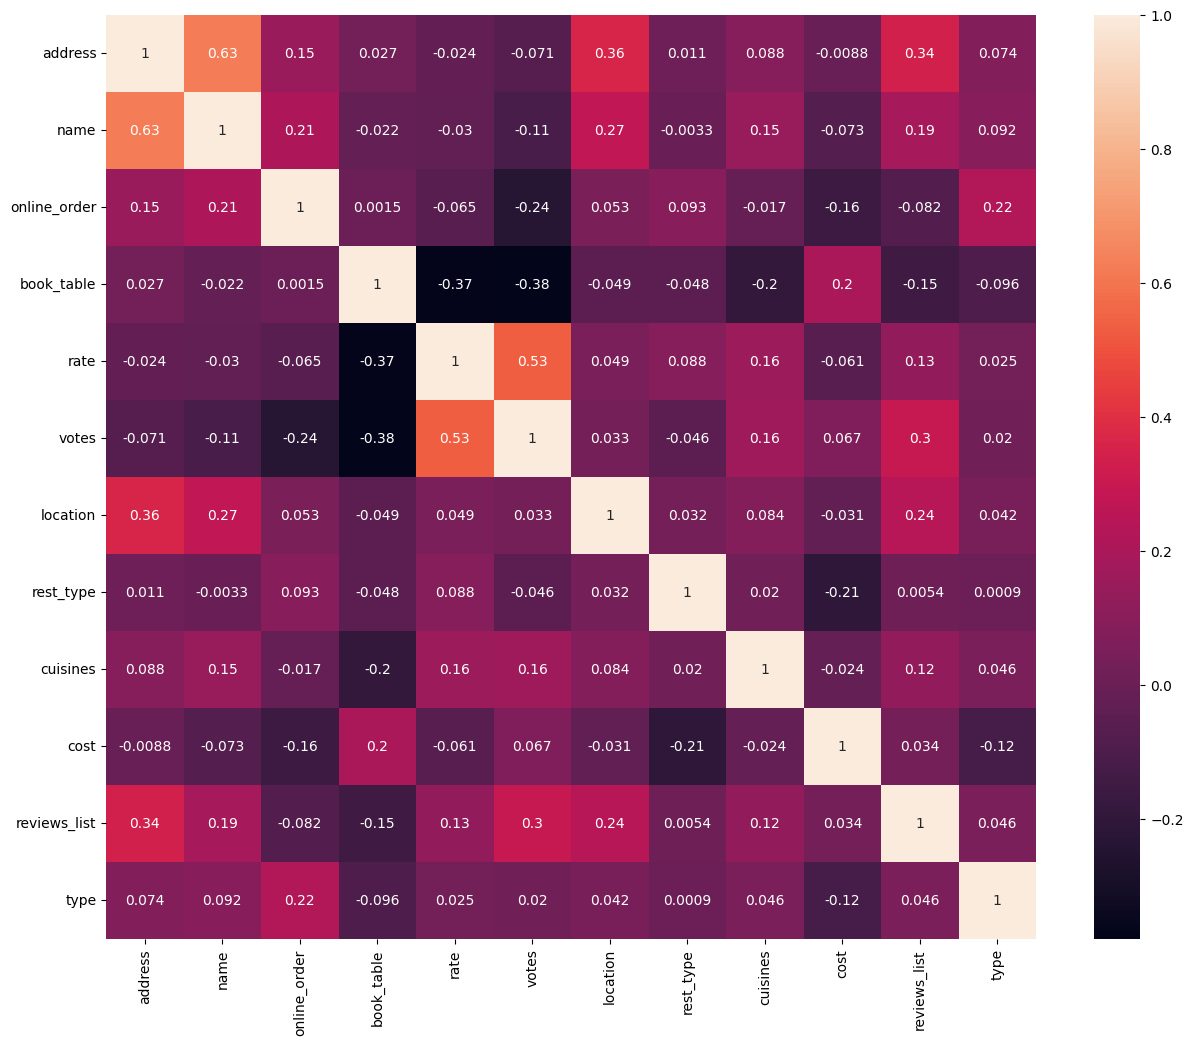

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)
plt.show()

In [17]:
df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        225
cuisines          45
cost             341
reviews_list       0
type               0
dtype: int64

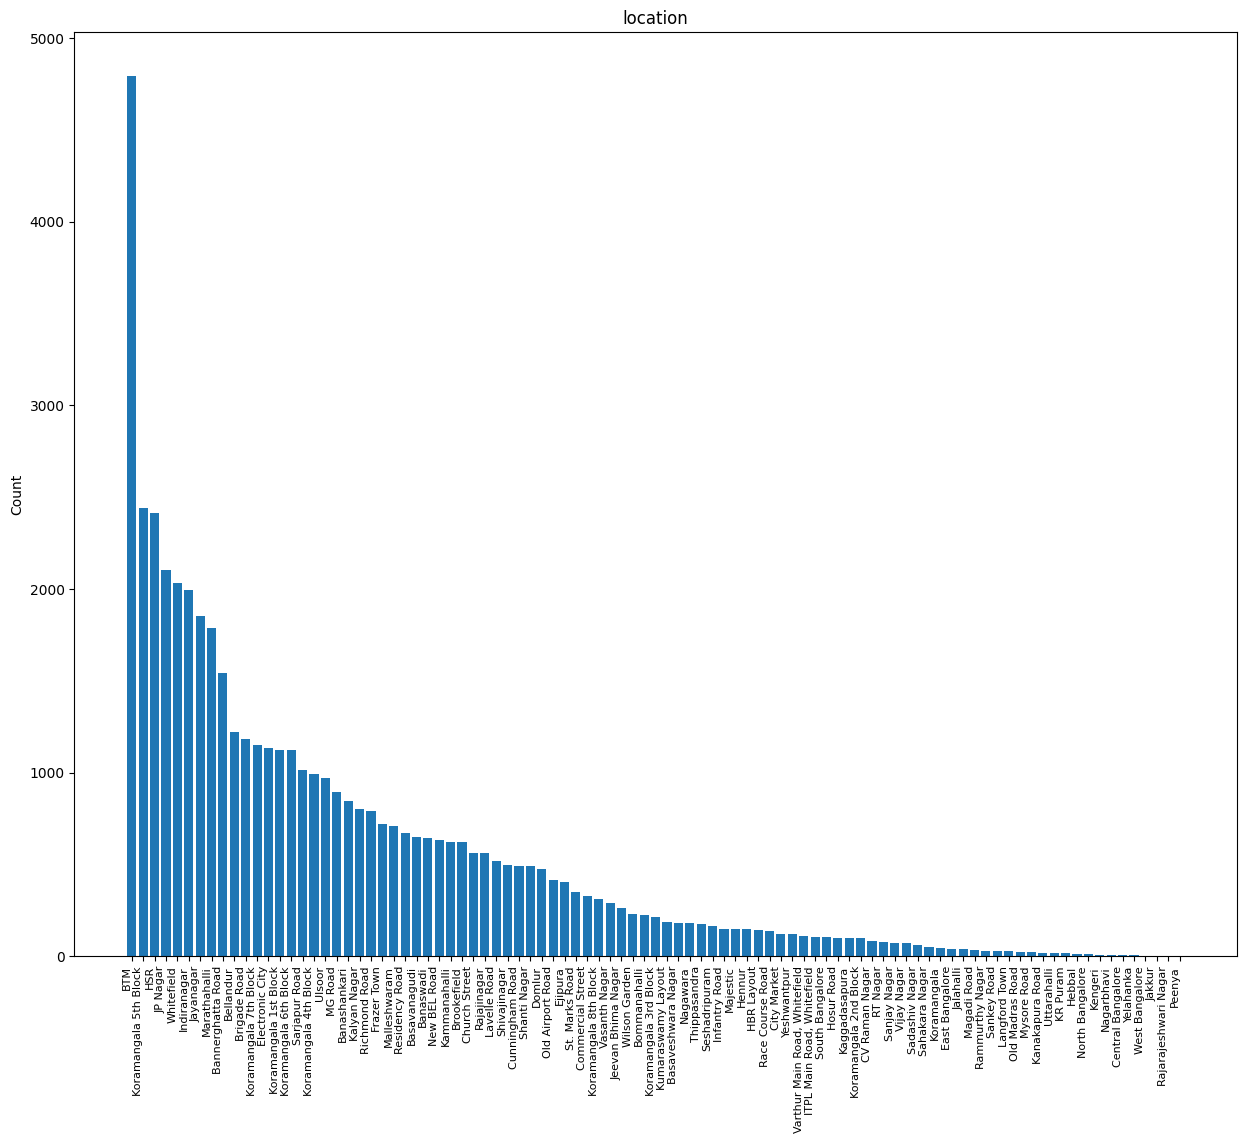

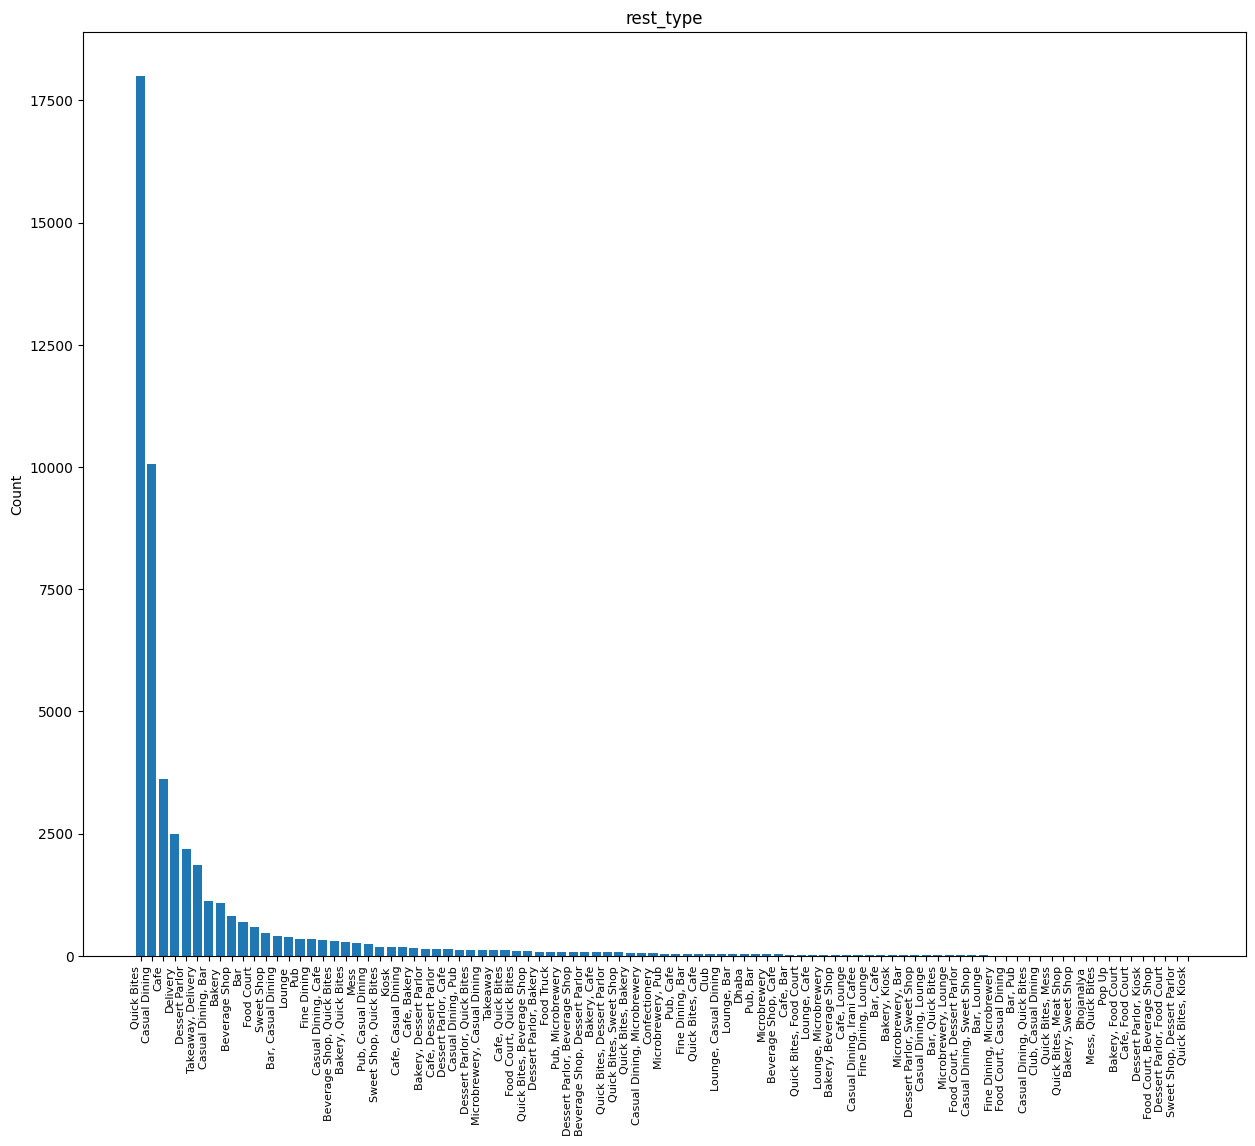

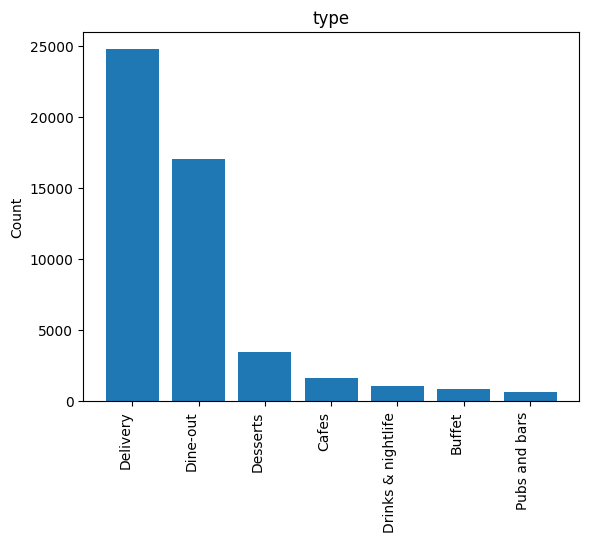

In [26]:
def plot_object_columns(df, selected_columns):

    object_columns = [col for col in selected_columns if df[col].dtype == np.object]

    for column_name in object_columns:
        value_counts = df[column_name].value_counts()

        if len(value_counts) >= 10:
            plt.figure(figsize=(15, 12))
            plt.xticks(rotation=90, ha="right", fontsize=8)
        else:
            plt.xticks(rotation=90, ha="right")

        plt.bar(value_counts.index, value_counts.values)
        plt.ylabel('Count')
        plt.title(column_name)
        plt.show()

object_columns_to_plot = ['location', 'rest_type', 'type']
plot_object_columns(df, object_columns_to_plot)

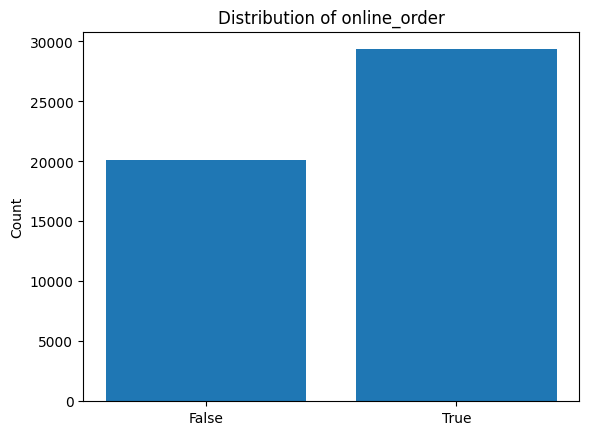

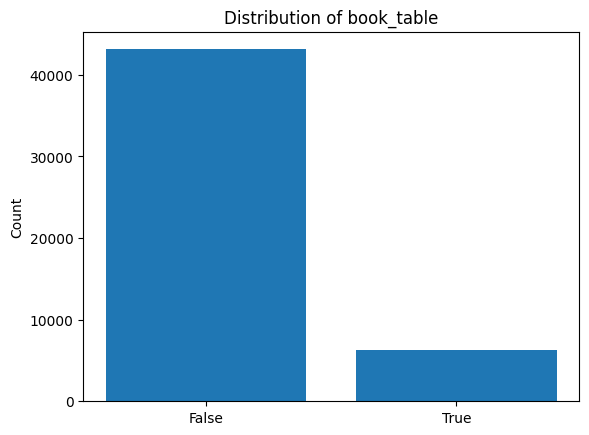

In [27]:
def plot_bool_columns(df):

    bool_columns = df.select_dtypes(include=[np.bool]).columns

    for column_name in bool_columns:
        value_counts = df[column_name].value_counts()

        plt.bar(value_counts.index, value_counts.values)
        plt.ylabel('Count')
        plt.title(f'Distribution of {column_name}')
        plt.xticks([True, False], ['True', 'False'])
        plt.show()

plot_bool_columns(df)